In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#importing all essential libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
#Here in our dataset we Dont have any explict Labelling so,ImageDAtaGenerator will make the folder name as its label
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau #This is to Modify the Learning Rate according to the performance of the model


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Dataset------ Rock_Paper_Scissors

               
               ->Dataset -->Paper
                          -->rock
                          -->Scissors

1)Now Let's **add**
# Data From the Data Folders,As Represented in the Above Hierarchy

In [3]:
Dataset='/kaggle/input/tensorflow-rockpaperscissors-dataset/TF_Rock_paper_dataset/Dataset'

In [4]:
#inorder to increase the diveristy of the images we are intended to flip the image in vertical,horizontal etc..
augumentation = ImageDataGenerator(
    rescale=1./255,        
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    validation_split = 0.2
)  

train_data = augumentation.flow_from_directory(
    Dataset,
    target_size = (224,224),
    batch_size=32,
    class_mode = 'categorical',
    shuffle=True,
)

validation_data = augumentation.flow_from_directory(
    Dataset,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset = 'validation'
)

Found 2188 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


# 2)Buidling a model using **Keras Sequential API**

In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (5,5), activation=tf.nn.relu,input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu,padding = 'Same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu,padding = 'Same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),

    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(3, activation = tf.nn.softmax)
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 batch_normalization (Batch  (None, 220, 220, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      36928     
                                                                 
 batch_normalization_1 (Bat  (None, 110, 110, 64)      256       
 chNormalization)                                                
                                                        

Defining the Callback Function(ReduceLROnPlateau) inorder to **prevent OverFitting Problem**

In [7]:
callbacks=ReduceLROnPlateau(monitor='accuracy', 
                              factor=0.2, 
                              patience=2, 
                              mode='min', 
                              min_lr=1e-6)

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [9]:
history = model.fit(train_data,
                    epochs = 30,
                    verbose = 1,
                   validation_data = validation_data,
                   callbacks=[callbacks])

Epoch 1/30
69/69 [==============================] - 51s 659ms/step - loss: 5.2199 - accuracy: 0.5457 - val_loss: 2.1131 - val_accuracy: 0.4462 - lr: 0.0010
Epoch 2/30
69/69 [==============================] - 39s 560ms/step - loss: 1.2173 - accuracy: 0.7271 - val_loss: 0.8478 - val_accuracy: 0.6682 - lr: 0.0010
Epoch 3/30
69/69 [==============================] - 39s 567ms/step - loss: 1.0407 - accuracy: 0.8117 - val_loss: 0.7304 - val_accuracy: 0.7803 - lr: 0.0010
Epoch 4/30
69/69 [==============================] - 39s 569ms/step - loss: 0.3658 - accuracy: 0.8944 - val_loss: 0.5373 - val_accuracy: 0.8215 - lr: 2.0000e-04
Epoch 5/30
69/69 [==============================] - 39s 566ms/step - loss: 0.2344 - accuracy: 0.9250 - val_loss: 0.4462 - val_accuracy: 0.8398 - lr: 2.0000e-04
Epoch 6/30
69/69 [==============================] - 40s 579ms/step - loss: 0.2307 - accuracy: 0.9301 - val_loss: 0.4767 - val_accuracy: 0.8467 - lr: 4.0000e-05
Epoch 7/30
69/69 [==============================] - 

In [10]:
model.save('rock_paper_scissors_model.hdf5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


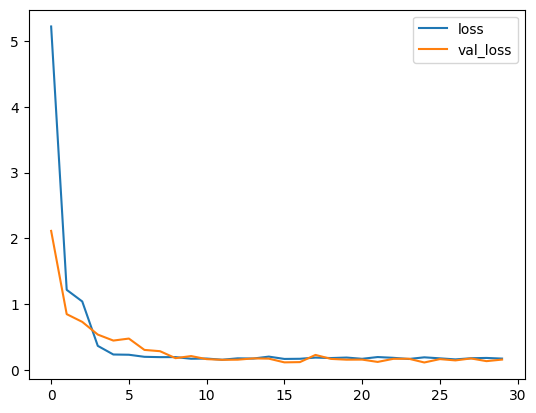

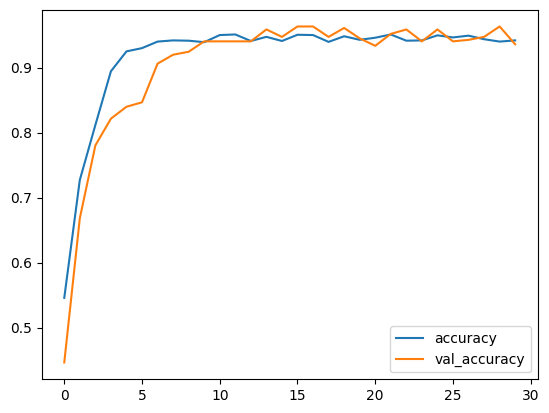

In [11]:
import pandas as pd
history_frame=pd.DataFrame(history.history)
history_frame.loc[:,['loss','val_loss']].plot()
history_frame.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

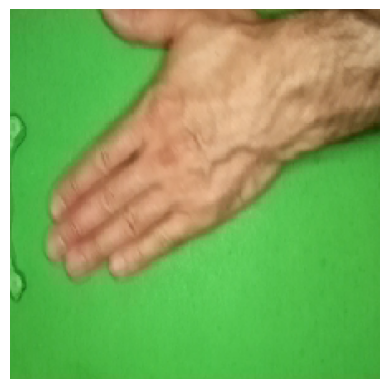

1/1 [==============================] - 0s 215ms/step
The predicted class is: Scissors


In [12]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Load the image using TensorFlow's load_img
img_path = "/kaggle/input/tensorflow-rockpaperscissors-dataset/TF_Rock_paper_dataset/Dataset/paper/0RA9rcrv8iVvuDDU.png"
img = load_img(img_path, target_size=(224, 224))

# Display the loaded image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels for better visualization
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)

# Load the pre-trained model
model = load_model("/kaggle/working/rock_paper_scissors_model.hdf5")

# Make predictions
output = model.predict(img)

# Assuming your model has 3 output classes
class_labels = ["Paper", "Rock", "Scissors"]
predicted_class_index = np.argmax(output)
predicted_class = class_labels[predicted_class_index]

print(f"The predicted class is: {predicted_class}")


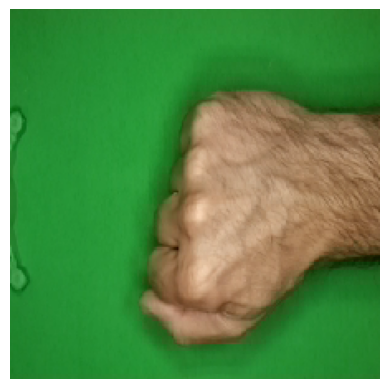

1/1 [==============================] - 0s 107ms/step
The predicted class is: Scissors


In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Load the image using TensorFlow's load_img
img_path = "/kaggle/input/tensorflow-rockpaperscissors-dataset/TF_Rock_paper_dataset/Dataset/rock/0bioBZYFCXqJIulm.png"
img = load_img(img_path, target_size=(224, 224))

# Display the loaded image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels for better visualization
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)

# Load the pre-trained model
model = load_model("/kaggle/working/rock_paper_scissors_model.hdf5")

# Make predictions
output = model.predict(img)

# Assuming your model has 3 output classes
class_labels = ["Paper", "Rock", "Scissors"]
predicted_class_index = np.argmax(output)
predicted_class = class_labels[predicted_class_index]

print(f"The predicted class is: {predicted_class}")


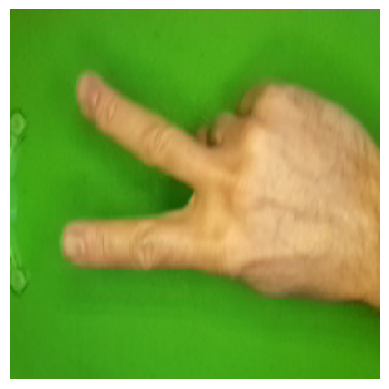

1/1 [==============================] - 0s 101ms/step
The predicted class is: Scissors


In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Load the image using TensorFlow's load_img
img_path = "/kaggle/input/tensorflow-rockpaperscissors-dataset/TF_Rock_paper_dataset/Dataset/scissors/2E8j595xseKRF60J.png"
img = load_img(img_path, target_size=(224, 224))

# Display the loaded image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels for better visualization
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)

# Load the pre-trained model
model = load_model("/kaggle/working/rock_paper_scissors_model.hdf5")

# Make predictions
output = model.predict(img)

# Assuming your model has 3 output classes
class_labels = ["Paper", "Rock", "Scissors"]
predicted_class_index = np.argmax(output)
predicted_class = class_labels[predicted_class_index]

print(f"The predicted class is: {predicted_class}")


# The Above is a wrong Predication -------------????? Right Comment your suggestion to overcome this